In [1]:
import datajoint as dj

Add the directories (Path depends on your machine)

In [3]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

Plotting the behavior data

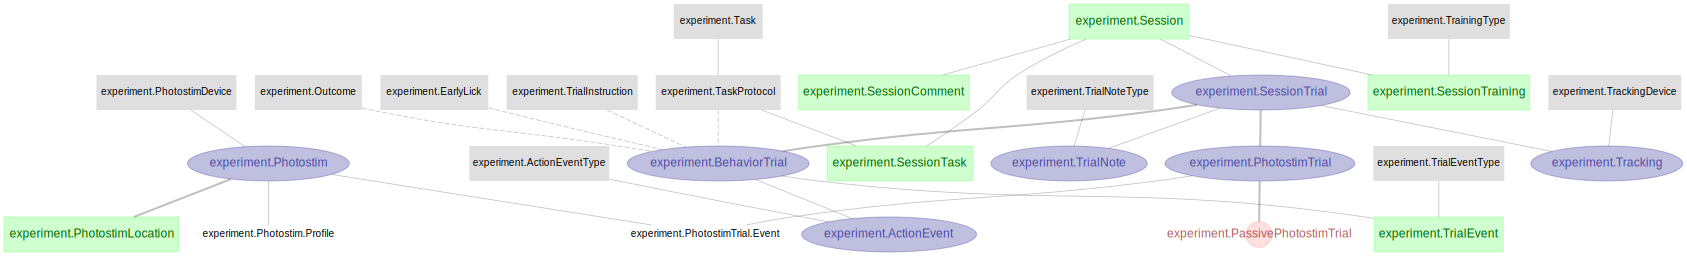

In [19]:
import experiment
dj.ERD(experiment)

In [5]:
import ephys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
session=experiment.Session()
session

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
407513,1,2018-02-24,daveliu,RRig
407513,2,2018-02-25,daveliu,RRig
407513,3,2018-02-26,daveliu,RRig
407513,4,2018-02-27,daveliu,RRig
407513,5,2018-02-28,daveliu,RRig
407513,6,2018-03-01,daveliu,RRig
407513,7,2018-03-02,daveliu,RRig


In [10]:
animal = 407513
sessionN = 2

In [11]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [12]:
outcome = (behaviorTrial & {'subject_id': animal} & {'session': sessionN}).fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & {'subject_id': animal} & {'session': sessionN}).fetch('early_lick', order_by='session')

In [13]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [14]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [16]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

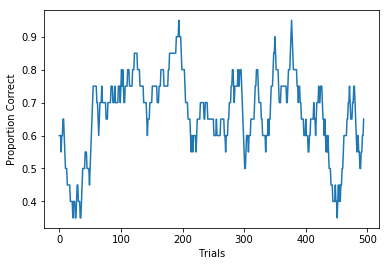

In [17]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

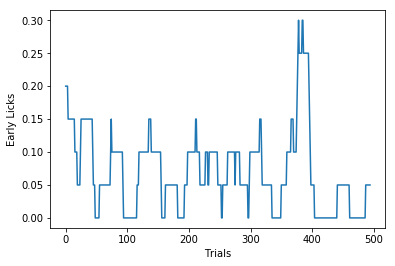

In [18]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')